# SKTime Forecasting for Clouds and non-continous Data

In [1]:
import warnings

import numpy as np
import pandas as pd

# hide warnings
warnings.filterwarnings("ignore")

In [2]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

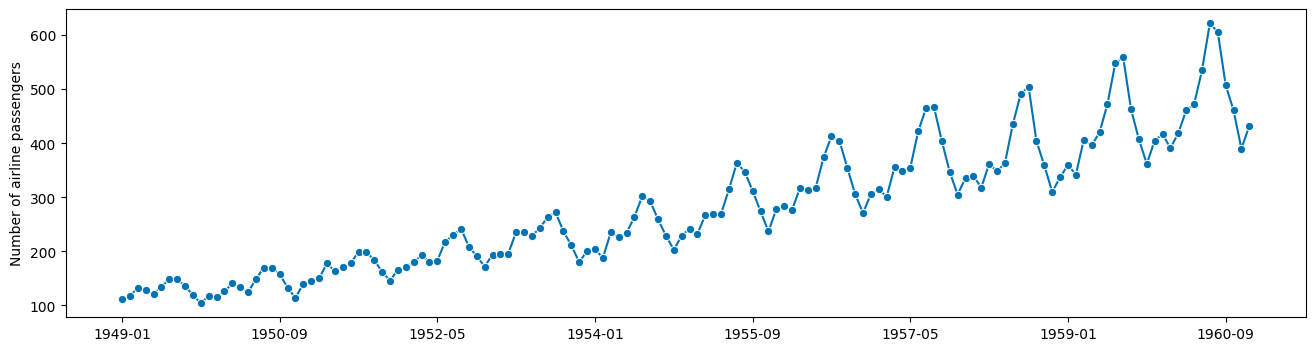

In [5]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [ ]:
# Steps in Workflow
The steps in this workflow are as follows:

1.Preparation of the data
2.Specification of the time points for which forecasts are requested. 
This uses a numpy.array or the ForecastingHorizon object.
3.Specification and instantiation of the forecaster. 
This follows a scikit-learn-like syntax; forecaster objects follow the familiar scikit-learn BaseEstimator interface.
4.Fitting the forecaster to the data, using the forecaster’s fit method
5.Making a forecast, using the forecaster’s predict method

In [6]:
# Forecasting horizon for the next 36 months
fh = np.arange(1, 37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [7]:
from sktime.forecasting.base import ForecastingHorizon

In [8]:
#absolute forecasting horizon based on  month
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [ ]:
# Forecasting Algorithm

In [9]:
from sktime.forecasting.naive import NaiveForecaster

In [11]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y)

NaiveForecaster()

In [12]:
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

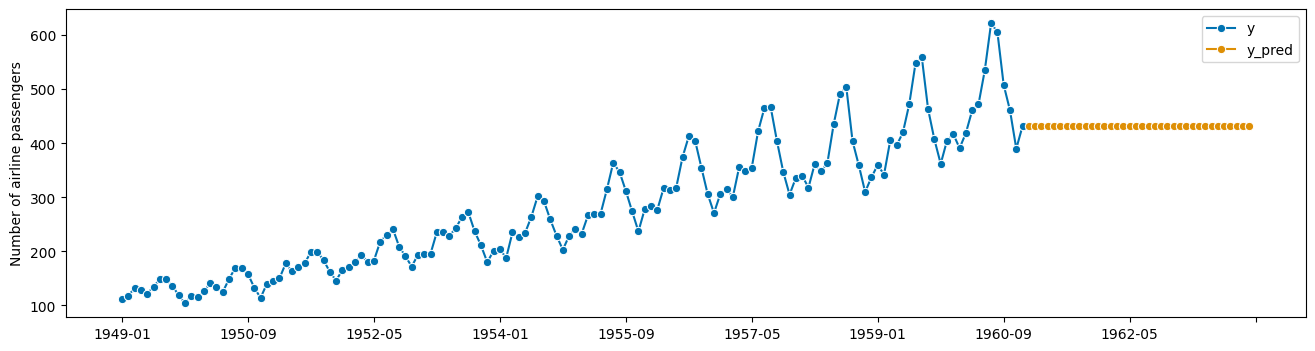

In [13]:
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [14]:
# All in One basic workflow:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

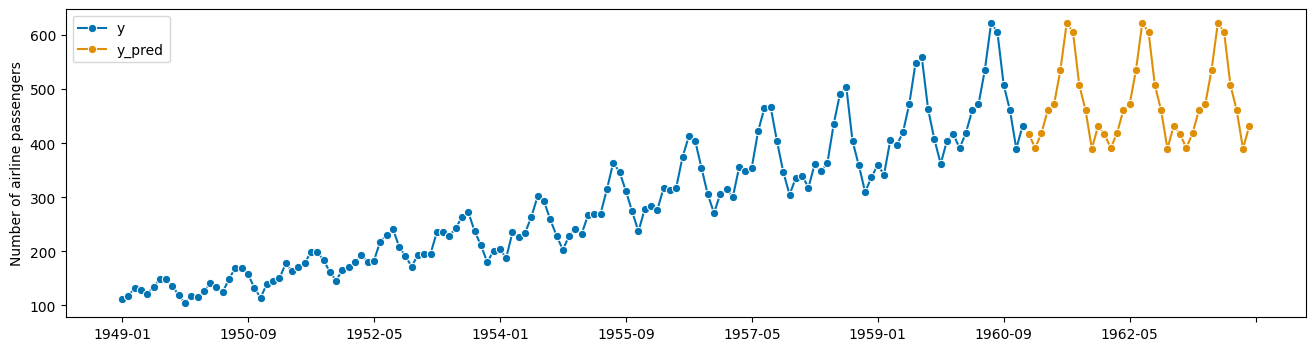

In [15]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
Test with Multivariate Forecasting too same info , multi output at once.

In [17]:
y[:10]

1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
1949-06    135.0
1949-07    148.0
1949-08    148.0
1949-09    136.0
1949-10    119.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [18]:
# Now Do test with Dew and Temperature and Air_Pressure

In [20]:
import pickle 

In [21]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [59]:
y5_full = pd.Series(raw_METAR_data['wind_degrees']).reset_index()
y6_full = pd.Series(raw_METAR_data['wind_speed']).reset_index()
y7_full = pd.Series(raw_METAR_data['temperature']).reset_index()
y8_full = pd.Series(raw_METAR_data['dew']).reset_index()
y9_full = pd.Series(raw_METAR_data['air_pressure']).reset_index()

In [28]:
hour_series = raw_METAR_data['hour'].values

In [47]:
# set hours as the index 
ydata_list = [y1_full, y2_full, y3_full, y4_full, y5_full]
yname_list = ['wind_degrees','wind_speed','temperature','dew','air_pressure']
for ydata,yname in zip(ydata_list,yname_list):
    ydata = pd.Series(ydata)
    ydata.index = hour_series
    ydata.index.names = ["hour"]

In [62]:
y5_full.columns=['hour','degree']

In [77]:
y6_full.columns=['hour','speed']
y7_full.columns=['hour','temperature']
y8_full.columns=['hour','dew']
y9_full.columns=['hour','air_pressure']


In [107]:
y2_full.index

hour
0      9
1      9
2      9
3     10
4     10
      ..
19     4
20     5
21     4
22     4
23     0
Length: 89451, dtype: int64

In [108]:
y_cloud = pd.Series(raw_METAR_data['n_cloud_layers']).reset_index()

In [104]:
y_cloud.columns =['n_cloud_layers']

In [67]:
y1_exp = y5_full['degree'][:200]

In [73]:
y1_real = y5_full['degree'][:300]

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='degree'>)

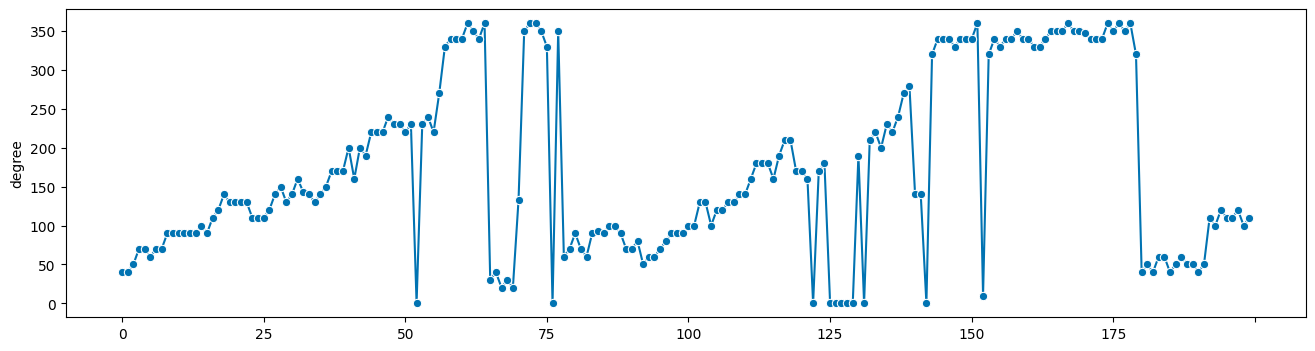

In [66]:
# plotting for visualization
plot_series(y5_full['degree'][:200])

In [71]:
# predict for next 3 days (72hrs)

#specify data
y = y5_full['degree'][:200]
y1_real = y5_full['degree'][:300]

# step 2: specifying forecasting horizon
fh = np.arange(1, 73)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=72)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='degree'>)

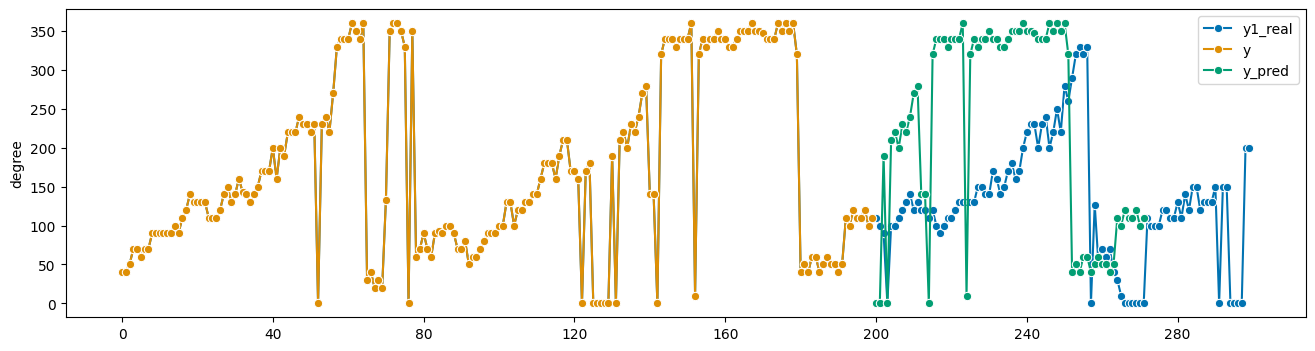

In [75]:
# optional: plotting predictions and past data
plot_series(y1_real, y, y_pred, labels=['y1_real',"y", "y_pred"])

In [ ]:
# run this test for cloud data . 

In [86]:
# predict for next 3 days (72hrs)

#specify data
y = y6_full['speed'][:2000]
y1_real = y6_full['speed'][:2060]

# step 2: specifying forecasting horizon
fh = np.arange(1, 6)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=6)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

NameError: name 'xlim' is not defined

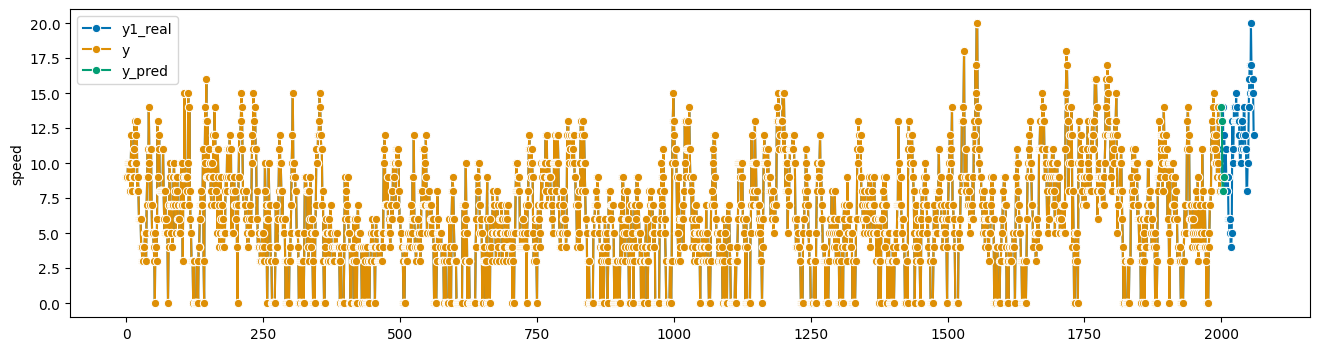

In [88]:
# optional: plotting predictions and past data
plot_series(y1_real, y, y_pred, labels=['y1_real',"y", "y_pred"])

In [91]:
y1_real[-60:-50]

2000     9
2001    11
2002    11
2003    14
2004     9
2005    12
2006    11
2007     8
2008    11
2009     9
Name: speed, dtype: int64

In [92]:
y_pred[:]

2000    14.0
2001    13.0
2002     8.0
2003     8.0
2004     9.0
Name: speed, dtype: float64

In [105]:
# predict for next 3 days (72hrs)

#specify data
y = y_cloud['n_cloud_layers'][:1000]
y1_real = y_cloud['n_cloud_layers'][:1010]

# step 2: specifying forecasting horizon
fh = np.arange(1, 10)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=6)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

KeyError: 'n_cloud_layers'